In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
np.random.seed(0)
X = np.linspace(0,10,100)
true_slope = 2.0
true_intercept = 5.0
y = true_slope * X + true_intercept + np.random.normal(scale=2.0,size=len(X))


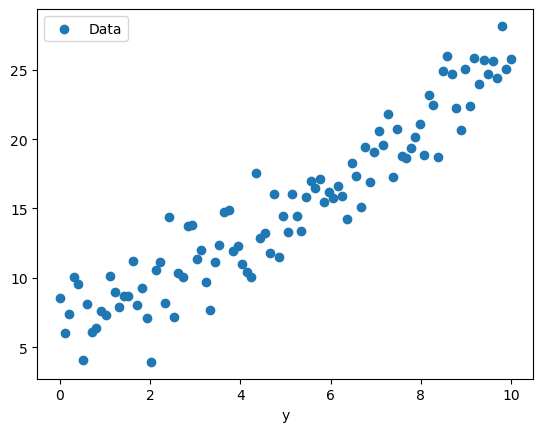

In [3]:
plt.scatter(X,y, label='Data')
plt.xlabel('X')
plt.xlabel('y')
plt.legend()
plt.show()


In [4]:
with pm.Model() as model:
    slope = pm.Normal('Slope',mu=0,sd=10)
    intercept = pm.Normal('intercept',mu=0,sd=10)
    y_pred = slope*X+intercept
    likelihood = pm.Normal('y',mu=y_pred,sd=2.0,observed=y)

In [5]:
with model:
    map_estimate = pm.find_MAP()
    print('MAP estimate:', map_estimate)
    


MAP estimate: {'Slope': array(1.94171565), 'intercept': array(5.40887439)}


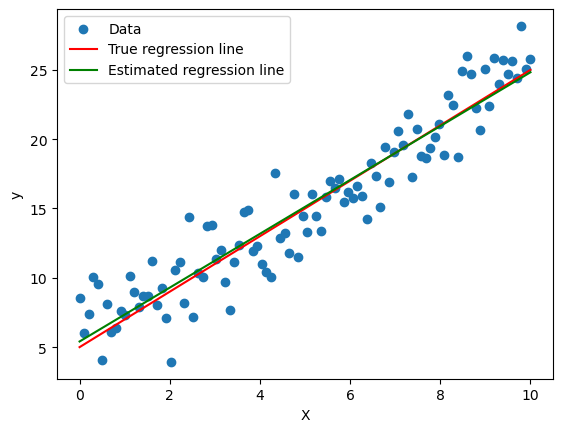

In [11]:
plt.scatter(X,y,label='Data')
plt.plot(X, true_slope * X + true_intercept, label='True regression line', color='red')
plt.plot(X, map_estimate['Slope'] * X + map_estimate['intercept'], label='Estimated regression line', color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()